In [59]:
import pandas as pd
from src.data.preprocess import clean_text

df = pd.read_csv(r"C:\Users\Arun\Documents\AI_projects\automatic_ticket_categorisation\data\raw\synthetic_complaints.csv")

df["cleaned_text"] = df["complaint_text"].apply(clean_text)

df[["complaint_text", "cleaned_text"]].head(5)


,complaint_text,cleaned_text
0,Unable to login to my account need urgent. help,unable login account need urgent help
1,<b>My account was locked without reason please...,account lock without reason please resolve asap
2,Facing error code while using... the service t...,face error code use service unacceptable
3,App crashes whenever I try to open it no respo...,app crash whenever try open response support
4,Service experience was poor! please resolve asap,service experience poor please resolve asap


In [7]:
import os
print(os.getcwd())

C:\Users\Arun\Documents\AI_projects\automatic_ticket_categorisation\notebooks


In [8]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

print(PROJECT_ROOT)

C:\Users\Arun\Documents\AI_projects\automatic_ticket_categorisation


In [60]:
df.to_csv("../data/processed/cleaned_complaints.csv", index=False)

# EDA

In [61]:
df.head()

,complaint_id,complaint_text,category,submitted_via,created_date,cleaned_text
0,100000,Unable to login to my account need urgent. help,Account Management,Chat,23-06-2024,unable login account need urgent help
1,100001,<b>My account was locked without reason please...,Account Management,Email,15-05-2024,account lock without reason please resolve asap
2,100002,Facing error code while using... the service t...,Technical Support,Chat,12-08-2024,face error code use service unacceptable
3,100003,App crashes whenever I try to open it no respo...,Technical Support,Chat,26-06-2024,app crash whenever try open response support
4,100004,Service experience was poor! please resolve asap,Other,Phone,25-09-2024,service experience poor please resolve asap


In [58]:
import pandas as pd
from pathlib import Path

# set project root
BASE_DIR = Path.cwd().parent

# load data
dfx = pd.read_csv(BASE_DIR / "data" / "processed" / "cleaned_complaints.csv")

dfx.head()


,complaint_id,complaint_text,category,submitted_via,created_date,cleaned_text,text_length
0,100000,Unable to login to my account need urgent. help,Account Management,Chat,2024-06-23,unable login account need urgent help,9
1,100001,<b>My account was locked without reason please...,Account Management,Email,2024-05-15,account lock without reason please resolve asap,9
2,100002,Facing error code while using... the service t...,Technical Support,Chat,2024-08-12,face error code use service unacceptable,10
3,100003,App crashes whenever I try to open it no respo...,Technical Support,Chat,2024-06-26,app crash whenever try open response support,12
4,100004,Service experience was poor! please resolve asap,Other,Phone,2024-09-25,service experience poor please resolve asap,7


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   complaint_id    25000 non-null  int64 
 1   complaint_text  25000 non-null  object
 2   category        25000 non-null  object
 3   submitted_via   25000 non-null  object
 4   created_date    25000 non-null  object
 5   cleaned_text    25000 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [63]:
df.shape

(25000, 6)

In [64]:
df.isnull().sum()

complaint_id      0
complaint_text    0
category          0
submitted_via     0
created_date      0
cleaned_text      0
dtype: int64

## Category distribution

In [65]:
df['category'].value_counts()

category
Product Issue         5041
Account Management    5013
Technical Support     5007
Billing               5003
Other                 4936
Name: count, dtype: int64

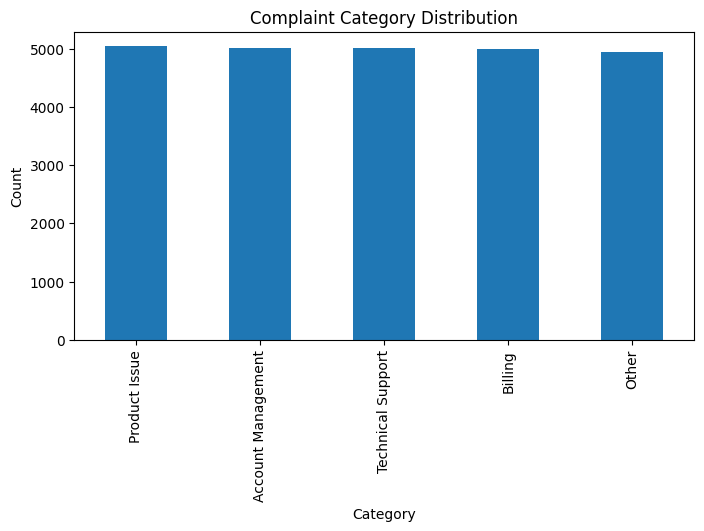

In [66]:
import matplotlib.pyplot as plt

df["category"].value_counts().plot(kind="bar", figsize=(8,4))
plt.title("Complaint Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


## Complaint text length analysis

In [67]:
df["text_length"] = df["complaint_text"].str.split().apply(len)


In [68]:
df.head()

,complaint_id,complaint_text,category,submitted_via,created_date,cleaned_text,text_length
0,100000,Unable to login to my account need urgent. help,Account Management,Chat,23-06-2024,unable login account need urgent help,9
1,100001,<b>My account was locked without reason please...,Account Management,Email,15-05-2024,account lock without reason please resolve asap,9
2,100002,Facing error code while using... the service t...,Technical Support,Chat,12-08-2024,face error code use service unacceptable,10
3,100003,App crashes whenever I try to open it no respo...,Technical Support,Chat,26-06-2024,app crash whenever try open response support,12
4,100004,Service experience was poor! please resolve asap,Other,Phone,25-09-2024,service experience poor please resolve asap,7


In [69]:
df["text_length"].describe()


count    25000.000000
mean         9.903680
std          1.912922
min          6.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: text_length, dtype: float64

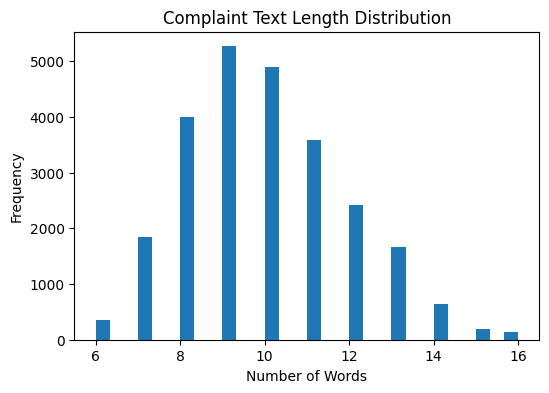

In [70]:
plt.figure(figsize=(6,4))
plt.hist(df["text_length"], bins=30)
plt.title("Complaint Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [71]:
df.groupby('category')['text_length'].mean().sort_values()

category
Account Management     9.266707
Product Issue          9.298354
Other                  9.482982
Technical Support     10.170961
Billing               11.299420
Name: text_length, dtype: float64

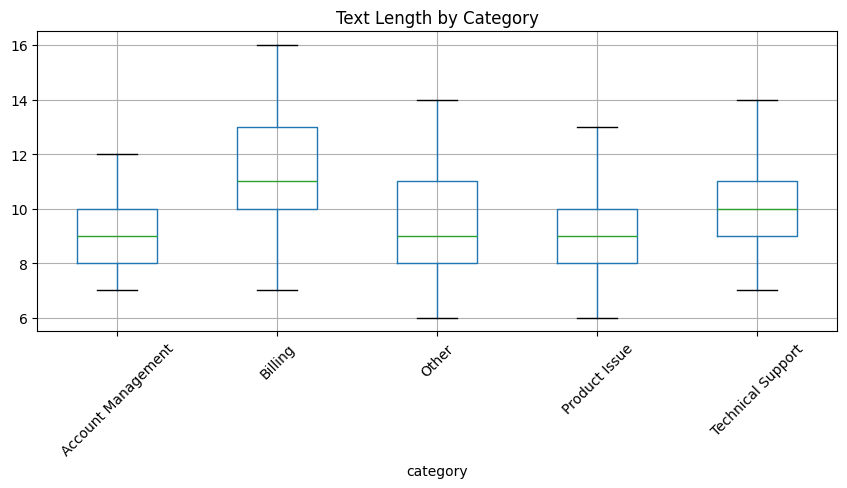

In [72]:
df.boxplot(column="text_length", by="category", figsize=(10,4))
plt.xticks(rotation=45)
plt.title("Text Length by Category")
plt.suptitle("")
plt.show()


## Most frequent words

In [73]:
from collections import Counter

all_words = " ".join(df["complaint_text"]).split()
word_freq = Counter(all_words)

word_freq.most_common(20)


[('the', 9156),
 ('is', 7297),
 ('to', 6773),
 ('for', 5602),
 ('last', 5595),
 ('from', 4672),
 ('no', 4662),
 ('3', 4662),
 ('happening', 4652),
 ('response', 4650),
 ('this', 4585),
 ('please', 4536),
 ('resolve', 4519),
 ('my', 4417),
 ('need', 4404),
 ('urgent', 4362),
 ('support', 3709),
 ('not', 3551),
 ('account', 3373),
 ('was', 3338)]

In [74]:
all_words = " ".join(df["cleaned_text"]).split()
word_freq = Counter(all_words)

word_freq.most_common(20)


[('support', 6029),
 ('last', 6014),
 ('need', 5886),
 ('response', 5080),
 ('unacceptable', 5061),
 ('please', 5006),
 ('resolve', 5006),
 ('asap', 5006),
 ('day', 4986),
 ('urgent', 4867),
 ('help', 4867),
 ('happen', 4798),
 ('account', 4042),
 ('product', 3034),
 ('charge', 2979),
 ('service', 2939),
 ('face', 2048),
 ('without', 2035),
 ('bill', 2000),
 ('work', 1967)]

In [75]:
for cat in df["category"].unique():
    words = " ".join(df[df["category"] == cat]["cleaned_text"]).split()
    print(cat, Counter(words).most_common(10))


Account Management [('account', 4042), ('face', 1063), ('issue', 1063), ('update', 1063), ('detail', 1063), ('please', 1030), ('resolve', 1030), ('asap', 1030), ('unacceptable', 1025), ('lock', 1021)]
Technical Support [('response', 1044), ('support', 1044), ('app', 1043), ('crash', 1043), ('whenever', 1043), ('try', 1043), ('open', 1043), ('last', 1041), ('day', 1041), ('website', 1019)]
Other [('support', 1993), ('service', 1954), ('need', 1938), ('response', 1044), ('unacceptable', 1021), ('clarification', 1019), ('regard', 1019), ('company', 1019), ('policy', 1019), ('want', 1014)]
Billing [('charge', 2979), ('last', 2016), ('bill', 2000), ('late', 1052), ('fee', 1052), ('apply', 1052), ('even', 1052), ('though', 1052), ('time', 1052), ('twice', 1028)]
Product Issue [('product', 3034), ('receive', 1063), ('happen', 1044), ('last', 1044), ('day', 1044), ('unacceptable', 1018), ('miss', 1004), ('component', 1004), ('package', 1004), ('item', 1003)]


## Channel-wise analysis

In [76]:
df["submitted_via"].value_counts()


submitted_via
Website    6335
Chat       6283
Phone      6214
Email      6168
Name: count, dtype: int64

In [77]:
df.groupby('submitted_via')['category'].value_counts()

submitted_via  category          
Chat           Product Issue         1293
               Other                 1266
               Technical Support     1260
               Account Management    1242
               Billing               1222
Email          Product Issue         1270
               Billing               1242
               Account Management    1238
               Technical Support     1217
               Other                 1201
Phone          Account Management    1273
               Billing               1270
               Technical Support     1246
               Other                 1216
               Product Issue         1209
Website        Technical Support     1284
               Billing               1269
               Product Issue         1269
               Account Management    1260
               Other                 1253
Name: count, dtype: int64

In [80]:
df["created_date"] = pd.to_datetime(df["created_date"])


C:\Users\Arun\AppData\Local\Temp\ipykernel_2456\3173629706.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["created_date"] = pd.to_datetime(df["created_date"])


In [78]:
df.head()

,complaint_id,complaint_text,category,submitted_via,created_date,cleaned_text,text_length
0,100000,Unable to login to my account need urgent. help,Account Management,Chat,23-06-2024,unable login account need urgent help,9
1,100001,<b>My account was locked without reason please...,Account Management,Email,15-05-2024,account lock without reason please resolve asap,9
2,100002,Facing error code while using... the service t...,Technical Support,Chat,12-08-2024,face error code use service unacceptable,10
3,100003,App crashes whenever I try to open it no respo...,Technical Support,Chat,26-06-2024,app crash whenever try open response support,12
4,100004,Service experience was poor! please resolve asap,Other,Phone,25-09-2024,service experience poor please resolve asap,7


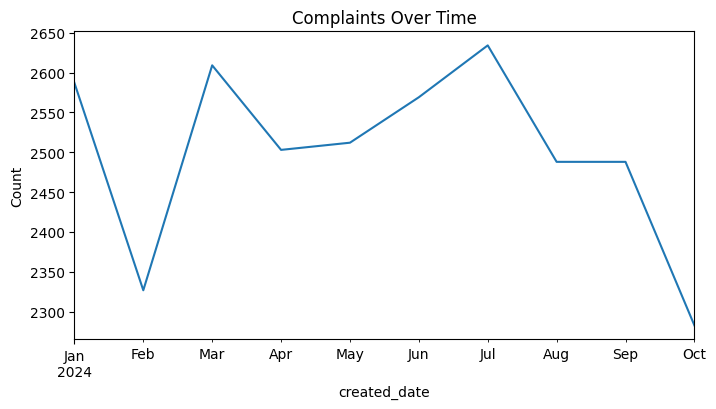

In [82]:
df.set_index("created_date").resample("ME").size().plot(figsize=(8,4))
plt.title("Complaints Over Time")
plt.ylabel("Count")
plt.show()


# Feature Extraction

In [88]:
from sklearn.model_selection import train_test_split

X = df["cleaned_text"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),      # unigrams + bigrams
    min_df=2,               # ignore rare words
    max_df=0.9              # ignore very common words
)


In [90]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [91]:
X_train_tfidf.shape


(20000, 315)

In [92]:
import joblib
from pathlib import Path

MODEL_DIR = Path.cwd().parent / "models"
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(tfidf, MODEL_DIR / "tfidf_vectorizer.pkl")


['C:\\Users\\Arun\\Documents\\AI_projects\\automatic_ticket_categorisation\\models\\tfidf_vectorizer.pkl']

In [93]:
tfidf.get_feature_names_out()[:20]


array(['account', 'account detail', 'account happen', 'account lock',
       'account need', 'account please', 'account response',
       'account unacceptable', 'add', 'add without', 'advertise',
       'advertise happen', 'advertise need', 'advertise please',
       'advertise response', 'advertise unacceptable', 'app', 'app crash',
       'appear', 'appear invoice'], dtype=object)

In [96]:
from sklearn.linear_model import LogisticRegression

# Create Model

In [97]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",   # helps if classes are imbalanced
    n_jobs=-1
)


# Train and make predictions

In [98]:
log_reg.fit(X_train_tfidf, y_train)


C:\Users\Arun\Documents\AI_projects\automatic_ticket_categorisation\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [99]:
y_pred = log_reg.predict(X_test_tfidf)


In [100]:
y_proba = log_reg.predict_proba(X_test_tfidf)


In [101]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

Account Management       1.00      1.00      1.00      1003
           Billing       1.00      1.00      1.00      1001
             Other       1.00      1.00      1.00       987
     Product Issue       1.00      1.00      1.00      1008
 Technical Support       1.00      1.00      1.00      1001

          accuracy                           1.00      5000
         macro avg       1.00      1.00      1.00      5000
      weighted avg       1.00      1.00      1.00      5000



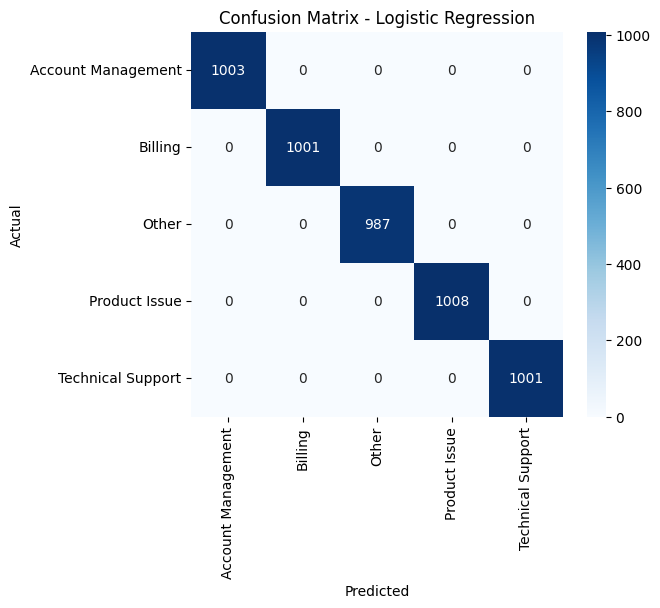

In [104]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [105]:
print(cm)

[[1003    0    0    0    0]
 [   0 1001    0    0    0]
 [   0    0  987    0    0]
 [   0    0    0 1008    0]
 [   0    0    0    0 1001]]


In [106]:
MODEL_DIR = Path.cwd().parent / "models"
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(log_reg, MODEL_DIR / "logistic_regression_model.pkl")

['C:\\Users\\Arun\\Documents\\AI_projects\\automatic_ticket_categorisation\\models\\logistic_regression_model.pkl']

In [109]:
sample_text = "my refund has not been processed even after multiple follow ups"
sample_text = "Poor service experience. kindly rectify."

sample_clean = sample_text  # assume cleaned if your pipeline already cleans input
sample_vec = tfidf.transform([sample_clean])

log_reg.predict(sample_vec)

array(['Other'], dtype=object)

In [110]:
test_cases = [
    "money deducted but service not working",
    "cannot access my account and payment failed",
    "product stopped working after update",
]

for t in test_cases:
    print(t, "→", log_reg.predict(tfidf.transform([t]))[0])


money deducted but service not working → Other
cannot access my account and payment failed → Account Management
product stopped working after update → Product Issue


In [112]:
from src.inference.predict import predict_and_route

predict_and_route("money deducted but service not working")


{'predicted_category': 'Other',
 'confidence': 0.904,
 'routed_to': 'Manual Review Queue'}

In [113]:
from src.inference.predict import predict_and_route
from src.inference.store import store_prediction

complaint = "cannot login and payment failed"

result = predict_and_route(complaint)
store_prediction(complaint, result)

result


{'predicted_category': 'Account Management',
 'confidence': 0.496,
 'routed_to': 'Account Services'}

In [114]:
pip install streamlit

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.0 MB 9.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.4/9.0 MB 9.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/9.0 MB 9.3 MB/s eta 0:00:01
   -------------------------------- ------- 7.3/9.0 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 9.0/9.0 MB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   --------------------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
df.head(20)

,complaint_id,complaint_text,category,submitted_via,created_date,cleaned_text,text_length
0,100000,Unable to login to my account need urgent. help,Account Management,Chat,2024-06-23,unable login account need urgent help,9
1,100001,<b>My account was locked without reason please...,Account Management,Email,2024-05-15,account lock without reason please resolve asap,9
2,100002,Facing error code while using... the service t...,Technical Support,Chat,2024-08-12,face error code use service unacceptable,10
3,100003,App crashes whenever I try to open it no respo...,Technical Support,Chat,2024-06-26,app crash whenever try open response support,12
4,100004,Service experience was poor! please resolve asap,Other,Phone,2024-09-25,service experience poor please resolve asap,7
5,100005,<b>My payment was successful but the bill stil...,Billing,Email,2024-06-26,payment successful bill still show unpaid happ...,16
6,100006,The<br>product stopped. working within a week ...,Product Issue,Chat,2024-10-19,product stop work within week response support,10
7,100007,Unable to login to my account no response from...,Account Management,Email,2024-09-25,unable login account response support,10
8,100008,Missing<br>components in the package please re...,Product Issue,Website,2024-08-08,miss component package please resolve asap,7
9,100009,I<br>want to file a general complaint need urg...,Other,Phone,2024-05-06,want file general complaint need urgent help,9
